In [1]:
!pip install SQLAlchemy==1.4.49

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.4 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.20
    Uninstalling SQLAlchemy-2.0.20:
      Successfully uninstalled SQLAlchemy-2.0.20
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.49 which is incompatible.


# Please run this in google colab. Import the stroke_data.sqlite and Stroke_Predictor.h5 files into the content folder for colab. Both are located within the 'resources' folder of the repository.

In [2]:
import sqlalchemy
import pandas as pd

from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

# Database Setup
engine = create_engine("sqlite:////content/stroke_data.sqlite")

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

#test view all classes found by automap
Base.classes.keys()

conn = engine.connect()

#populate stroke data table
stroke_df = pd.read_sql('SELECT * FROM stroke_data', conn)

stroke_df.head()

,?,age,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,1.040584334185826,2.723410903530197,1.193238162209789,0,1,0,1,0,0,0,1,0,1,0,0,1
1,1,1.614270327485722,-0.0005227665986433442,0.5893896105370293,0,1,0,1,0,0,1,0,0,0,1,0,1
2,2,0.24624988192443203,1.4485291841720218,0.8692218661902591,0,1,0,1,0,0,0,1,0,0,0,1,1
3,3,1.5701406356934222,1.5126504540805694,-0.6624915331747888,0,1,0,0,1,0,1,0,0,0,1,0,1
4,4,1.6584000192780215,1.7808947977464298,0.07390913959686891,0,1,0,1,0,0,0,1,0,1,0,0,1


In [3]:
stroke_df = stroke_df.drop(['?'], axis = 1)
stroke_df.head()

,age,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1.040584334185826,2.723410903530197,1.193238162209789,0,1,0,1,0,0,0,1,0,1,0,0,1
1,1.614270327485722,-0.0005227665986433442,0.5893896105370293,0,1,0,1,0,0,1,0,0,0,1,0,1
2,0.24624988192443203,1.4485291841720218,0.8692218661902591,0,1,0,1,0,0,0,1,0,0,0,1,1
3,1.5701406356934222,1.5126504540805694,-0.6624915331747888,0,1,0,0,1,0,1,0,0,0,1,0,1
4,1.6584000192780215,1.7808947977464298,0.07390913959686891,0,1,0,1,0,0,0,1,0,1,0,0,1


In [4]:
stroke_df = stroke_df.apply(pd.to_numeric, errors='coerce')

In [5]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [6]:
y = stroke_df['stroke']
X = stroke_df.drop(columns='stroke')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("Stroke_Predictor.h5")

In [10]:
y_prediction = model.predict(X_test)
y_prediction = y_prediction>.0825

#Create confusion matrix and normalizes it over predicted (columns)
from sklearn.metrics import confusion_matrix

result = confusion_matrix(y_test, y_prediction>.0825)
print(result)

39/39 [==============================] - 0s 6ms/step
[[856 322]
 [  9  59]]


In [21]:
predictions = []
for i in y_prediction:
    if i == True:
        predictions.append(1)
    else:
        predictions.append(0)

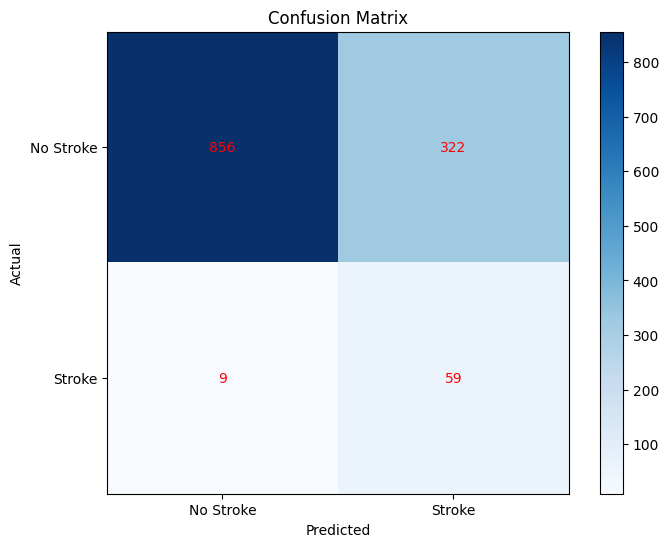

In [24]:
import matplotlib.pyplot as plt
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

# Confusion Matrix
confusion = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks([0, 1], ["No Stroke", "Stroke"])
plt.yticks([0, 1], ["No Stroke", "Stroke"])
plt.colorbar()

# Adding annotations to the confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion[i, j], ha='center', va='center', color='red')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()